prompt：

Create a Python script that uses Streamlit to build an interactive web application where users can adjust three parameters using sliders:

The number of data points (between 100 and 1000).
The variance of the dataset (between 1 and 20).
The distance threshold for classifying points as Y=0 or Y=1 based on their distance from the origin (between 2 and 10).
The dataset should consist of 2D points randomly generated using a normal distribution centered at (0,0) with the specified variance. For each point, calculate its distance from the origin and assign a label Y=0 if the distance is less than the threshold and Y=1 if the distance is greater than or equal to the threshold.

Use a Support Vector Machine (SVM) with an RBF kernel to classify the points. After training the SVM, plot the decision boundary in a 3D space, with the x-axis representing the first feature, the y-axis representing the second feature, and the z-axis representing the decision function.

The plot should display:

A 3D scatter plot of the dataset, with points labeled as Y=0 in blue and Y=1 in red.
A decision surface showing how the SVM separates the two classes.
Clear axis labels and a legend distinguishing the two classes.
Additionally, include the following:

Use Streamlit’s sidebar for user controls to adjust the number of samples, variance, and distance threshold.
Dynamically update the plot when any of the sliders are adjusted.
Provide the full Streamlit app code, making sure to include necessary libraries such as streamlit, numpy, matplotlib, scikit-learn, and mpl_toolkits.mplot3d."

In [4]:
# Install required packages
!pip install streamlit -q
!npm install localtunnel

# Get your public IP (optional, useful for debugging or info)
!wget -q -O - ipv4.icanhazip.com



up to date, audited 23 packages in 538ms

3 packages are looking for funding
  run `npm fund` for details

2 moderate severity vulnerabilities

To address all issues (including breaking changes), run:
  npm audit fix --force

Run `npm audit` for details.
34.127.50.54


In [5]:
# Write your Streamlit app code to 'app.py' file
%%writefile app.py

import streamlit as st
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# 生成數據點
def generate_data(n_samples=600, mean=[0, 0], var=10):
    np.random.seed(42)
    cov = [[var, 0], [0, var]]
    X = np.random.multivariate_normal(mean, cov, n_samples)
    distances = np.sqrt(X[:, 0]**2 + X[:, 1]**2)
    Y = np.where(distances < 4, 0, 1)
    return X, Y

# 訓練 SVM 模型 (RBF 核)
def fit_svm(X, Y):
    model = make_pipeline(StandardScaler(), SVC(kernel='rbf', gamma='auto', C=1.0))
    model.fit(X, Y)
    return model

# 繪製 3D 決策邊界
def plot_decision_boundary_3d(X, Y, model):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))

    Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax.scatter(X[Y == 0, 0], X[Y == 0, 1], Y[Y == 0], color='blue', label='Y=0', alpha=0.6)
    ax.scatter(X[Y == 1, 0], X[Y == 1, 1], Y[Y == 1], color='red', label='Y=1', alpha=0.6)

    ax.plot_surface(xx, yy, Z, rstride=1, cstride=1, alpha=0.3, cmap='coolwarm', edgecolor='none')
    ax.contourf(xx, yy, Z, zdir='z', offset=-1, cmap='coolwarm', alpha=0.3)

    ax.set_xlabel("Feature 1")
    ax.set_ylabel("Feature 2")
    ax.set_zlabel("Decision Function")
    ax.set_title("SVM with RBF Kernel - 3D Decision Boundary")
    ax.legend(loc="upper right")
    return fig

# Streamlit 互動介面
st.title("2D SVM with RBF Kernel - Interactive 3D Plot")

# 加入側邊欄 slider 控制
n_samples = st.sidebar.slider("Number of Samples", 100, 1000, 600)
variance = st.sidebar.slider("Variance", 1, 20, 10)
distance_threshold = st.sidebar.slider("Distance Threshold", 2, 10, 4)

# 生成數據並訓練模型
X, Y = generate_data(n_samples=n_samples, var=variance)
svm_model = fit_svm(X, Y)

# 生成並顯示 3D 圖表
fig = plot_decision_boundary_3d(X, Y, svm_model)
st.pyplot(fig)

st.write(f"Generated dataset with {n_samples} samples, Variance = {variance}, Distance Threshold = {distance_threshold}")


Overwriting app.py


In [ ]:

# 啟動 Streamlit 及本地隧道
!streamlit run app.py & npx localtunnel --port 8501 --allow-invalid-hostnames

your url is: https://young-carrots-knock.loca.lt



  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.127.50.54:8501



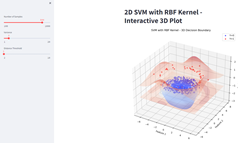